In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gaussian_hmm import GaussHMM

In [3]:
from hmm import HMM, hmm_opts
import gc

In [4]:
from utils.utils import rescale_spectrogram

In [5]:
import matplotlib.pyplot as plt

In [6]:
datapath = '/home/gagan/data/zudeep/bird_hdfs/b3g20'
netEpath = '/home/gagan/data/zudeep/models/nz_12_residual/2021-05-05_10-41-37.547480/netE_epoch_6.pth'
netGpath = '/home/gagan/data/zudeep/models/nz_12_residual/2021-05-05_10-41-37.547480/netG_epoch_6.pth'

In [7]:
hmm_opts

{'hidden_state_size': [5, 10, 15, 20, 30, 50, 75, 100],
 'covariance_type': 'spherical',
 'fit_params': 'stmc',
 'transmat_prior': 1.0,
 'n_iter': 300,
 'tolerance': 0.01,
 'nz': 16,
 'ngf': 264,
 'nc': 1,
 'covars_prior': 1.0,
 'init_params': 'stmc',
 'imageH': 129,
 'imageW': 16,
 'noverlap': 0,
 'batchsize': 2,
 'train_proportion': 0.7,
 'nsamplesteps': 128,
 'nsamps': 10,
 'sample_var': 0.0,
 'sample_invtemperature': 1.0,
 'munge': False,
 'munge_len': 50,
 'n_restarts': 1,
 'do_chaining': False,
 'min_seq_multiplier': 10,
 'cuda': True,
 'hmm_random_state': 0,
 'last_day': -1,
 'start_from': 0,
 'datapath': '',
 'netEpath': '',
 'netGpath': '',
 'outpath': '',
 'resnet': False,
 'save_output': True,
 'get_audio': False}

In [10]:
hmm_opts['fit_params'] = 'stmc'

hmm_opts['save_output'] = False
hmm_opts['n_restarts'] = 1

hmm_opts['nz'] = 12
hmm_opts['ngf'] = 128
hmm_opts['resnet'] = True


hmm_opts['covars_prior'] = 1.2
hmm_opts['transmat_prior'] = 1.5

hmm_opts['covariance_type'] = 'diag'

hmm_opts['init_params'] = 'kmeans'
hmm_opts['munge'] = True
hmm_opts['munge_len'] = 40

hmm_opts['get_audio'] = False


In [11]:
hmm_ = HMM(datapath, netEpath=netEpath, netGpath=netGpath, hmm_opts=hmm_opts, save_output=False)

...total number of folders = 89 ...


In [123]:
%pdb

Automatic pdb calling has been turned OFF


In [13]:
Z = hmm_.Z
len(Z)

991

In [58]:
hmm_.Z = Z

In [12]:
res = hmm_.fit_single_day(30, hidden_size=50, lastmodel=None)

..... day is 2016-03-20 .....
... available files: 3178 ...
# learning hmm with 50 states #
# computing model entropy #
...... computing Entropy ......
..... Transition entropy = 2.00, Emission entropy = -4.17 .....


In [60]:
hmm_.close()

In [27]:
model = res[0]
test_scores = res[1]
train_scores = res[2]
med_active = res[3]
std_active = res[4]
Ltrain = res[5]
Ltest = res[6]

In [28]:
test_scores

42014.34662660179

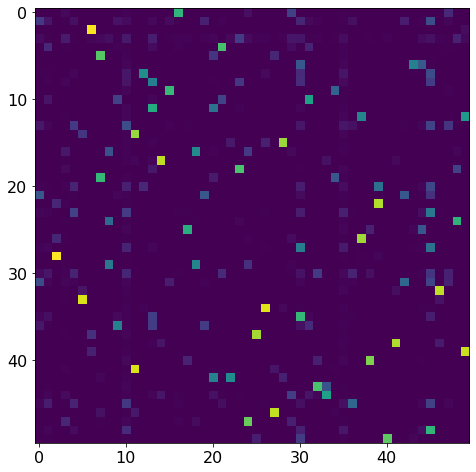

In [29]:
plt.figure(figsize = (8,8))
plt.imshow(model.transmat_)

# reconstruction

In [15]:
from utils.utils import decode_by_batch, overlap_decode, overlap_encode

In [ ]:
X = hmm_.dataset.get(day=20)

In [ ]:
Znew = overlap_encode(X[1], hmm_.netE, transform_sample = False, imageW = 16, noverlap = 2,
                   cuda = True)

In [ ]:
Znew = Znew.squeeze()
Znew.shape

In [ ]:
Xnew, audio  = overlap_decode(Z, hmm_.netG, noverlap = 2, get_audio = False, cuda = True)

In [ ]:
Xnew.shape

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(rescale_spectrogram(Xnew), origin='lower', cmap='gray')

In [ ]:
spect_out = 

In [ ]:
Z[0].shape

In [98]:
import torch

In [102]:
zhat = torch.from_numpy(Z[0][0]).float().view(1,16,1,1).cuda()
zhat.size()

torch.Size([1, 16, 1, 1])

In [103]:
out = hmm_.netG(zhat)

In [104]:
out.size()

torch.Size([1, 1, 129, 16])

In [90]:
len(X)

2002

In [ ]:
for l in range(10):
    plt.figure(figsize=(12,6))
    plt.imshow(spect_out[l], origin='lower', cmap='gray')
    #plt.imshow(rescale_spectrogram(X[l]),origin='lower', cmap='gray')

# generate spectrograms

In [74]:
hmm_.P

{'hidden_state_size': [5, 10, 15, 20, 30, 50, 75, 100],
 'covariance_type': 'diag',
 'fit_params': 'stmc',
 'transmat_prior': 1.0,
 'n_iter': 300,
 'tolerance': 0.01,
 'nz': 32,
 'ngf': 96,
 'nc': 1,
 'covars_prior': 1.0,
 'init_params': 'kmeans',
 'imageH': 129,
 'imageW': 16,
 'noverlap': 0,
 'batchsize': 2,
 'train_proportion': 0.7,
 'nsamplesteps': 48,
 'nsamps': 10,
 'sample_var': 0.0,
 'sample_invtemperature': 1.0,
 'munge_len': 50,
 'n_restarts': 1,
 'do_chaining': False,
 'min_seq_multiplier': 10,
 'cuda': True,
 'hmm_random_state': 0,
 'last_day': -1,
 'start_from': 0,
 'datapath': '',
 'netEpath': '',
 'netGpath': '',
 'outpath': '',
 'resnet': True,
 'save_output': False,
 'get_audio': False,
 'munge': True}

In [22]:
#hmm_.P['sample_var'] = 0.1
#hmm_.P['fit_params'] = 'stm'

hmm_.P['nsamplesteps'] = 48
hmm_.P['sample_invtemperature'] = 1.

In [28]:
model.covars_.shape

(20, 1, 32, 32)

In [51]:
[model.covars_[k][0][0,0] for k in range(model.n_components)]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [75]:
spect_out, audio_out = hmm_.generate_spectrogram_samples(model)

In [19]:
len(spect_out)

10

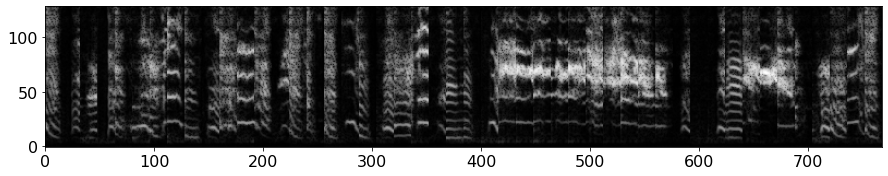

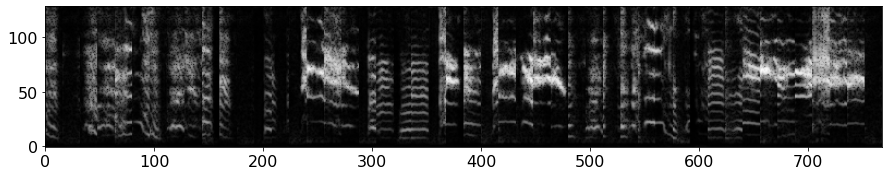

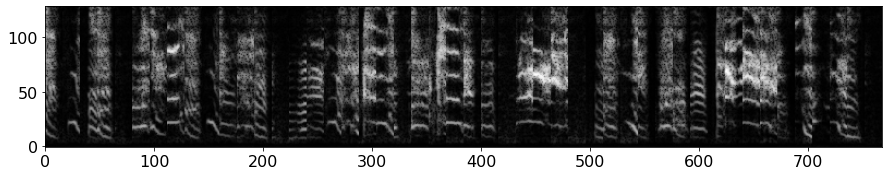

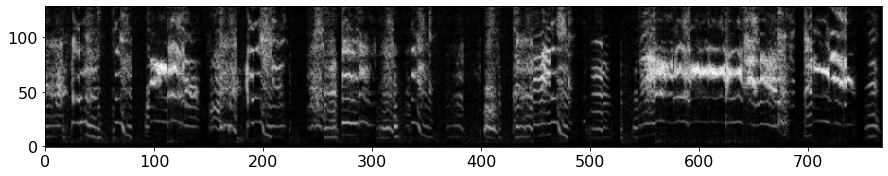

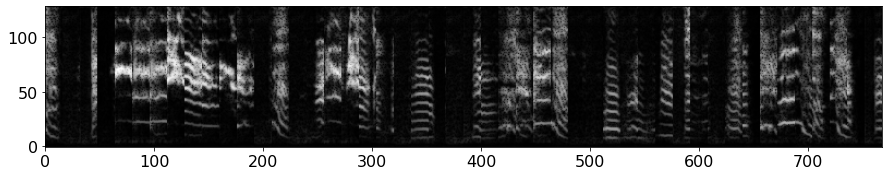

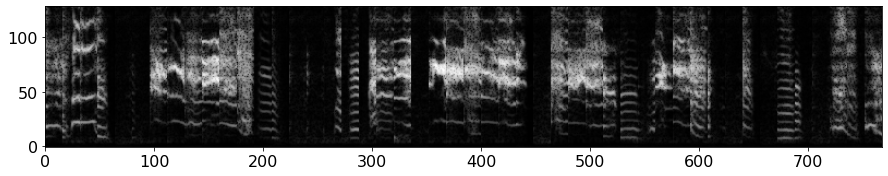

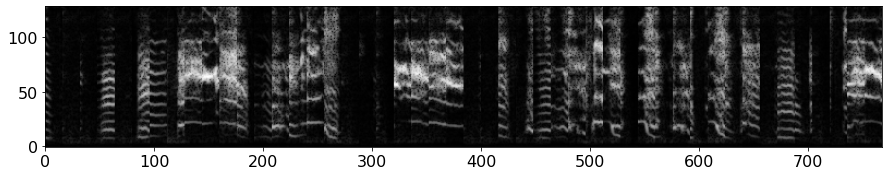

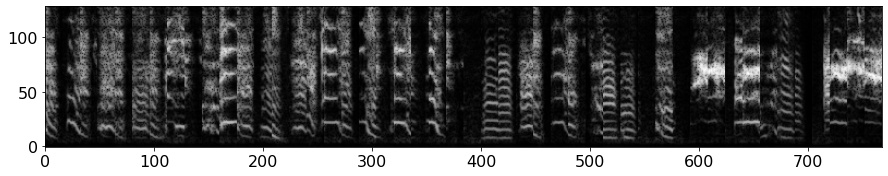

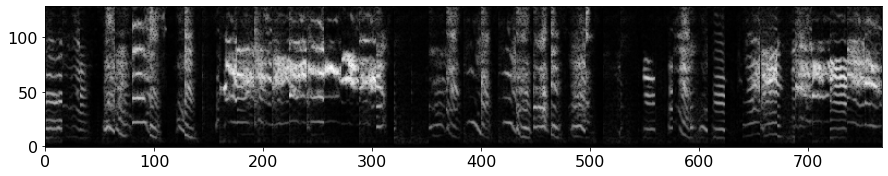

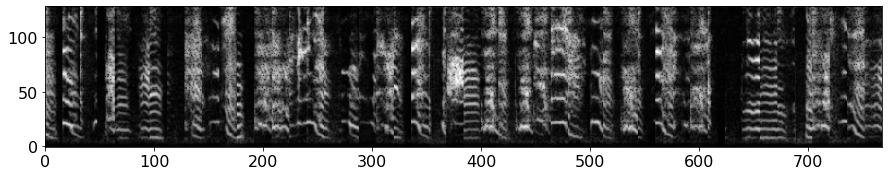

In [76]:
for l in range(len(spect_out)):
    plt.figure(figsize=(15,12))
    plt.imshow(rescale_spectrogram(spect_out[l]), origin='lower', cmap='gray')

# own gaussian 

In [26]:
import numpy as np

In [30]:
hmm2 = GaussHMM( K=30, D = 12, learn_params = 'stmc', startprob_prior_conc_weight = 1.2, transmat_prior_conc_weight = 1.5, mean_prior = 0., 
                 covar_prior_weight = 1.5, estimate_type = 'MAP', do_kmeans = True, n_iters = 100, tolerance = 1e-2, verbose = True)

In [31]:
type(Z)

list

In [32]:
Z[0].shape

(94, 12)

In [33]:
CC = np.cov(Z[0].T)

NameError: name 'np' is not defined

In [34]:
hmm2.fit(Z, log_every=1)

.....iteration 0, total log LL : -2037157.88746, change : -2037157.88746 .....
.....iteration 1, total log LL : -333099.91249, change : 1704057.97498 .....
.....iteration 2, total log LL : -6325.16060, change : 326774.75188 .....
.....iteration 3, total log LL : 51679.40448, change : 58004.56508 .....
.....iteration 4, total log LL : 102121.95386, change : 50442.54938 .....
.....iteration 5, total log LL : 140104.35520, change : 37982.40135 .....
.....iteration 6, total log LL : 171164.68946, change : 31060.33426 .....
.....iteration 7, total log LL : 192656.47184, change : 21491.78238 .....
.....iteration 8, total log LL : 214722.40134, change : 22065.92950 .....
.....iteration 9, total log LL : 236872.39185, change : 22149.99051 .....
.....iteration 10, total log LL : 253094.47316, change : 16222.08131 .....
.....iteration 11, total log LL : 263336.18194, change : 10241.70878 .....
.....iteration 12, total log LL : 271037.05351, change : 7700.87157 .....
.....iteration 13, total log 

In [47]:
h, zsamps = hmm2.sample(50)

In [48]:
zsamps.shape

(50, 12)

In [22]:
from utils.utils import overlap_decode, overlap_encode

In [49]:
samp_spects,_ = overlap_decode(zsamps, hmm_.netG,  noverlap = 0, cuda = True, get_audio = False)

In [50]:
samp_spects.shape

(129, 800)

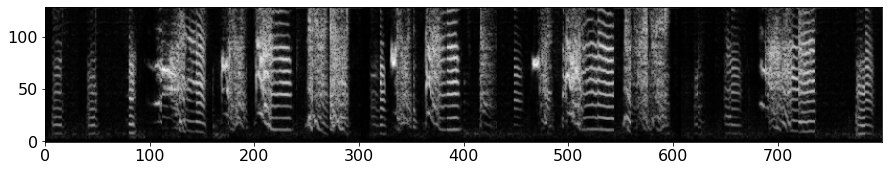

In [65]:
plt.figure(figsize=(15,6))
plt.imshow(rescale_spectrogram(samp_spects), origin='lower', cmap='gray')
#plt.savefig('/home/gagan/data/zudeep/hmm_dump/r15y5_nz12/day_22_hiddensize_30/samples_model_with_gagan_code.eps',dpi=100,format='eps')
#plt.close()

In [54]:
import numpy as np

In [55]:
np.sum(np.any(hmm2.transmat == 0.0))

0

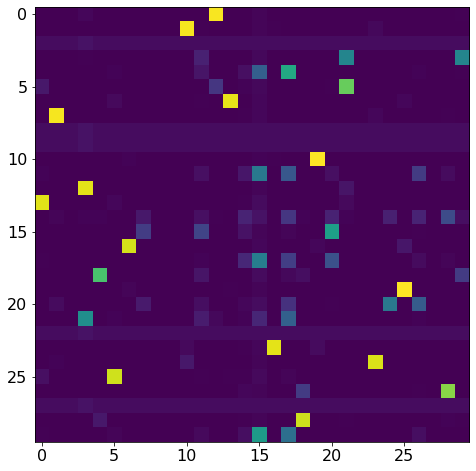

In [56]:
plt.figure(figsize = (8,8))
plt.imshow(hmm2.transmat)

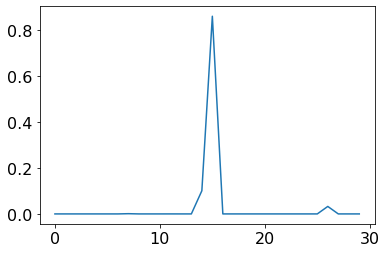

In [41]:
plt.plot(hmm2.startprob)

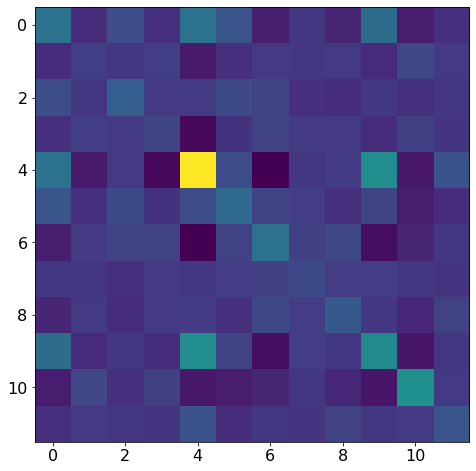

In [46]:
plt.figure(figsize = (8,8))
plt.imshow(hmm2.covs[4])

In [57]:
import joblib

In [63]:
joblib.dump({'model_hmmlearn': hmm_, 'model_gagan':hmm2, 'data': Z}, '/home/gagan/data/zudeep/hmm_dump/r15y5_nz12/day_22_hiddensize_30/model_with_gagan_code.pkl')

['/home/gagan/data/zudeep/hmm_dump/r15y5_nz12/day_22_hiddensize_30/model_with_gagan_code.pkl']